In [112]:
import os
os.getcwd()

'/Users/Moli/Documents/MachineLearning/Project/dog-breed-identification'

In [113]:
from os.path import join

image_dir = '/Users/Moli/Documents/InputML/Project/dog-breed-identification/train/'
img_paths = [join(image_dir, filename) for filename in 
                           ['0246f44bb123ce3f91c939861eb97fb7.jpg',
                            '84728e78632c0910a69d33f82e62638c.jpg',
                            '8825e914555803f4c67b26593c9d5aff.jpg',
                            '91a5e8db15bccfb6cfa2df5e8b95ec03.jpg']]

In [118]:
#img_paths
mytestimg_path=['/Users/Moli/Documents/InputML/Project/1478014917.jpg']

In [119]:
mytestimg_path

['/Users/Moli/Documents/InputML/Project/1478014917.jpg']

In [115]:
import numpy as np
from tensorflow.python.keras.applications.resnet50 import preprocess_input
from tensorflow.python.keras.preprocessing.image import load_img, img_to_array
mytestimg_path=['/Users/Moli/Documents/InputML/Project/1478014917.jpg']

image_size = 224

def read_and_prep_images(img_paths, img_height=image_size, img_width=image_size):
    imgs = [load_img(img_path, target_size=(img_height, img_width)) for img_path in img_paths]
    img_array = np.array([img_to_array(img) for img in imgs])
    output = preprocess_input(img_array)
    return(output)

In [116]:
#type(img_paths)

In [117]:
img_paths

['/Users/Moli/Documents/InputML/Project/dog-breed-identification/train/0246f44bb123ce3f91c939861eb97fb7.jpg',
 '/Users/Moli/Documents/InputML/Project/dog-breed-identification/train/84728e78632c0910a69d33f82e62638c.jpg',
 '/Users/Moli/Documents/InputML/Project/dog-breed-identification/train/8825e914555803f4c67b26593c9d5aff.jpg',
 '/Users/Moli/Documents/InputML/Project/dog-breed-identification/train/91a5e8db15bccfb6cfa2df5e8b95ec03.jpg']

In [84]:
#type(img_paths[0])

In [85]:
#test_data = read_and_prep_images(img_paths)
#test_data.shape

In [86]:
#img_paths[0]

In [87]:
#imgg = [load_img(img_path, target_size=(224, 224)) for img_path in img_paths]
#imgg = [load_img(img_paths[0], target_size=(224, 224))]
#type(imgg)

In [88]:
#imgg

In [89]:
#imgg[0]

In [90]:
#type(imgg)

In [91]:
#img_array = np.array([img_to_array(imgg[0])])
#img_to_array()

In [92]:
#np.array([[9, 9] for i in [1, 2, 3]])

In [120]:
from tensorflow.python.keras.applications import ResNet50
my_model = ResNet50(weights='/Users/Moli/Documents/InputML/Project/resnet50_weights_tf_dim_ordering_tf_kernels.h5')
#test_data = read_and_prep_images(img_paths)
test_data = read_and_prep_images(mytestimg_path)

preds = my_model.predict(test_data)

In [121]:
preds

array([[1.55618984e-08, 1.34282828e-07, 1.66027867e-08, 5.24633670e-09,
        6.36517484e-07, 1.28815046e-07, 1.05098884e-07, 1.36007159e-07,
        7.85453551e-08, 1.02224533e-07, 3.85930257e-08, 4.02919582e-08,
        7.57361079e-07, 2.77446929e-07, 9.59213708e-07, 3.08654720e-08,
        2.24215867e-07, 3.21538806e-07, 1.92960357e-07, 4.19654100e-07,
        7.39032302e-08, 6.52685230e-08, 8.58814460e-08, 1.35165649e-07,
        6.40204618e-08, 4.05145755e-07, 6.19429770e-08, 8.26973121e-08,
        2.31013118e-07, 1.68699771e-07, 3.07859196e-08, 7.12622779e-08,
        1.16177254e-08, 3.69398272e-08, 3.10306490e-07, 2.79226295e-08,
        2.69790291e-07, 4.54285555e-07, 2.92095770e-08, 2.59929180e-08,
        3.19501197e-07, 3.15160484e-08, 2.98617984e-08, 5.05658136e-07,
        5.54067583e-07, 5.39832058e-07, 3.33180061e-08, 1.72537383e-07,
        2.31951240e-08, 1.56985573e-06, 6.02130797e-07, 5.63694755e-07,
        4.43972183e-08, 4.27690736e-07, 5.01954037e-06, 2.243367

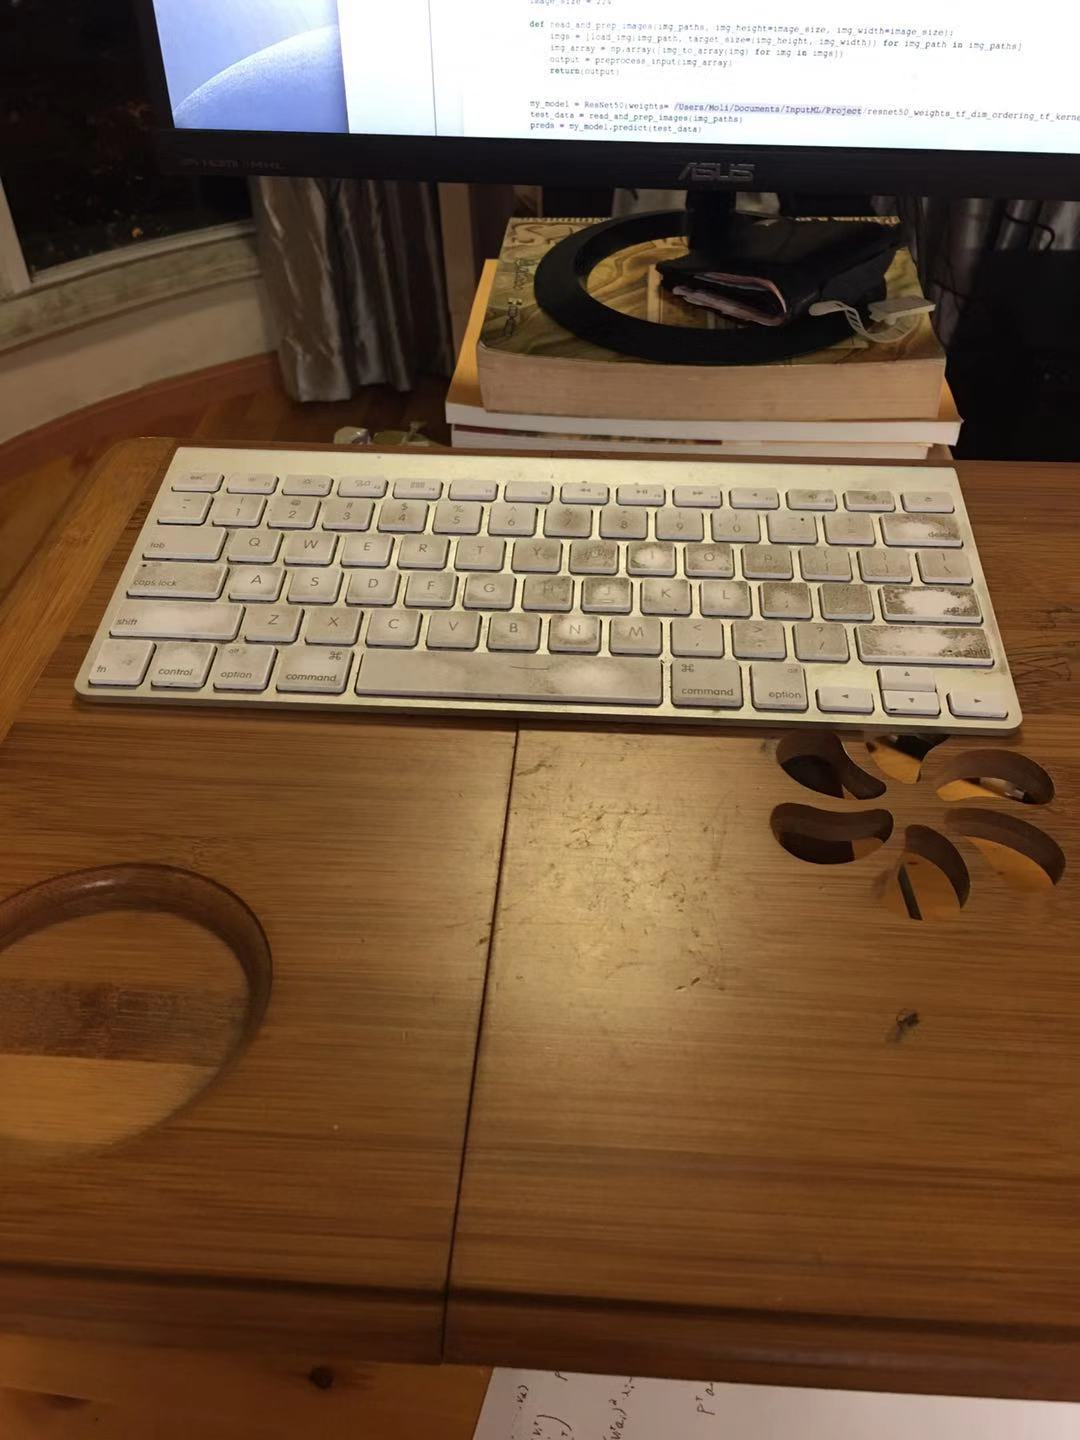

[('n03085013', 'computer_keyboard', 0.32519257), ('n03180011', 'desktop_computer', 0.25498283), ('n03782006', 'monitor', 0.15332411)]


In [123]:
#from tensorflow.python.keras.applications.resnet50 import decode_predictions
from  utils.decode_predictions import decode_predictions

from IPython.display import Image, display

most_likely_labels = decode_predictions(preds, top=3, class_list_path='/Users/Moli/Documents/MachineLearning/Project/dog-breed-identification/imagenet_class_index.json')

for i, img_path in enumerate(mytestimg_path):
    display(Image(img_path))
    print(most_likely_labels[i])

In [95]:
most_likely_labels

[[('n02097209', 'standard_schnauzer', 0.5650222),
  ('n02097047', 'miniature_schnauzer', 0.3131991),
  ('n02097130', 'giant_schnauzer', 0.045194596)],
 [('n02092339', 'Weimaraner', 0.9976726),
  ('n02099849', 'Chesapeake_Bay_retriever', 0.0013928371),
  ('n02109047', 'Great_Dane', 0.00032280292)],
 [('n02105855', 'Shetland_sheepdog', 0.91339093),
  ('n02106030', 'collie', 0.081452124),
  ('n02105056', 'groenendael', 0.0010965348)],
 [('n02110627', 'affenpinscher', 0.9366859),
  ('n02112706', 'Brabancon_griffon', 0.03435966),
  ('n02086240', 'Shih-Tzu', 0.011122933)]]

In [31]:
type(preds)

numpy.ndarray

In [29]:
preds.shape

(4, 1000)

In [30]:
np.sort(preds[0])

array([1.23769694e-09, 3.51012219e-09, 3.87293575e-09, 4.58242155e-09,
       5.58622526e-09, 6.34307584e-09, 6.78074263e-09, 7.68294317e-09,
       7.85346188e-09, 8.75353656e-09, 9.10751652e-09, 9.25254451e-09,
       9.37472677e-09, 9.46844025e-09, 9.73570469e-09, 1.11331238e-08,
       1.27200055e-08, 1.31323956e-08, 1.37993270e-08, 1.41004293e-08,
       1.45838364e-08, 1.48525983e-08, 1.49444972e-08, 1.52308246e-08,
       1.52792694e-08, 1.58613425e-08, 1.61107838e-08, 1.62093858e-08,
       1.74140649e-08, 1.83691462e-08, 1.84055526e-08, 1.86581346e-08,
       1.87323757e-08, 1.88714466e-08, 1.92207636e-08, 1.97166194e-08,
       2.00938377e-08, 2.04430375e-08, 2.08335997e-08, 2.11891056e-08,
       2.31857697e-08, 2.42162166e-08, 2.49019951e-08, 2.58004089e-08,
       2.58006061e-08, 2.62385171e-08, 2.66364175e-08, 2.74243490e-08,
       2.80085892e-08, 2.81027184e-08, 2.86792492e-08, 2.91457205e-08,
       2.92205300e-08, 2.94637008e-08, 2.98958511e-08, 3.00850154e-08,
      

In [6]:
import numpy as np

In [35]:
a = np.random.randn(2,5)
b=a[0]
b

array([ 0.6357045 , -2.68095101,  0.59084618,  0.34969142,  0.04477241])

In [36]:
b.argsort()

array([1, 4, 3, 2, 0])

In [41]:
b.argsort()[-2:]

array([2, 0])

In [43]:
b.argsort()[-2:][::-1]

array([0, 2])

In [44]:
results = []

In [ ]:
for pred in a:
    top_indices = pred.argsor()[-top:][::-1]
    result = [tuple]

In [96]:
import json
top = 3
CLASS_INDEX = json.load(open('/Users/Moli/Documents/MachineLearning/Project/dog-breed-identification/imagenet_class_index.json'))

results = []
for pred in preds:
    top_indices = pred.argsort()[-top:][::-1]
    result = [tuple(CLASS_INDEX[str(i)]) + (pred[i],) for i in top_indices]
    #result.sort(key=lambda x: x[2], reverse=True)
    results.append(result)
results


[[('n02097209', 'standard_schnauzer', 0.5650222),
  ('n02097047', 'miniature_schnauzer', 0.3131991),
  ('n02097130', 'giant_schnauzer', 0.045194596)],
 [('n02092339', 'Weimaraner', 0.9976726),
  ('n02099849', 'Chesapeake_Bay_retriever', 0.0013928371),
  ('n02109047', 'Great_Dane', 0.00032280292)],
 [('n02105855', 'Shetland_sheepdog', 0.91339093),
  ('n02106030', 'collie', 0.081452124),
  ('n02105056', 'groenendael', 0.0010965348)],
 [('n02110627', 'affenpinscher', 0.9366859),
  ('n02112706', 'Brabancon_griffon', 0.03435966),
  ('n02086240', 'Shih-Tzu', 0.011122933)]]

In [98]:
import json
top = 3
CLASS_INDEX = json.load(open('/Users/Moli/Documents/MachineLearning/Project/dog-breed-identification/imagenet_class_index.json'))

rsults = []
for pred in preds:
    top_indices = pred.argsort()[-top:][::-1]
    rsult = [tuple(CLASS_INDEX[str(i)]) + (pred[i],) for i in top_indices]
    #rsult.sort(key=lambda x: x[2], reverse=True)
    rsults.append(rsult)
rsults

[[('n02097209', 'standard_schnauzer', 0.5650222),
  ('n02097047', 'miniature_schnauzer', 0.3131991),
  ('n02097130', 'giant_schnauzer', 0.045194596)],
 [('n02092339', 'Weimaraner', 0.9976726),
  ('n02099849', 'Chesapeake_Bay_retriever', 0.0013928371),
  ('n02109047', 'Great_Dane', 0.00032280292)],
 [('n02105855', 'Shetland_sheepdog', 0.91339093),
  ('n02106030', 'collie', 0.081452124),
  ('n02105056', 'groenendael', 0.0010965348)],
 [('n02110627', 'affenpinscher', 0.9366859),
  ('n02112706', 'Brabancon_griffon', 0.03435966),
  ('n02086240', 'Shih-Tzu', 0.011122933)]]

In [ ]:
  results = []
  for pred in preds:
    top_indices = pred.argsort()[-top:][::-1]
    result = [tuple(CLASS_INDEX[str(i)]) + (pred[i],) for i in top_indices]
    result.sort(key=lambda x: x[2], reverse=True)
    results.append(result)
  return results